In [1]:
# Lit le fichier CSV  et le charge dans un DataFrame 'df'
import pandas as pd
df= pd.read_csv("Dataset_Depression_finale.csv")
df

,Unnamed: 0,content
0,0,rt doreencaven fear people watch many performa...
1,1,rt karoromitchelle spend rest trapped sneaky l...
2,2,rt urgent appeal action express much feel man ...
3,5,rt shivanyasitole supreme god kabir god kabir ...
4,6,rt trust im leaving staying staying always wis...
...,...,...
12301,18573,catasters
12302,18574,zegalbamount fuji seen international space sta...
12303,18575,thehopefulquotes loving someone mean taking ri...
12304,18576,perfectfeelings want talk happened without men...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12306 entries, 0 to 12305
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12306 non-null  int64 
 1   content     12299 non-null  object
dtypes: int64(1), object(1)
memory usage: 192.4+ KB


In [3]:
df['content'].describe()

count              12299
unique             12011
top       mental illness
freq                  17
Name: content, dtype: object

In [4]:
df['content'].isnull().sum()

np.int64(7)

In [5]:
df.dropna(inplace=True)

In [6]:
df['content'].isnull().sum()

np.int64(0)

In [7]:
# Colonnes utiles
df['text_length'] = df['content'].apply(len)
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Tableau de statistiques simplifié
summary_table = pd.DataFrame({
    'Statistique': [
        'Nombre total de textes',
        'Longueur moyenne des textes',
        'Nombre moyen de mots',
        'Longueur max des textes',
        'Longueur min des textes',
        'Vocabulaire unique',
       
    ],
    'Valeur': [
        len(df),
        round(df['text_length'].mean(), 2),
        round(df['word_count'].mean(), 2),
        df['text_length'].max(),
        df['text_length'].min(),
        len(set(' '.join(df['content']).split())),
        # df['sentiment'].value_counts().to_dict()
    ]
})

print(summary_table.to_string(index=False))

                Statistique   Valeur
     Nombre total de textes 12299.00
Longueur moyenne des textes    90.65
       Nombre moyen de mots    13.16
    Longueur max des textes  1298.00
    Longueur min des textes     2.00
         Vocabulaire unique 26619.00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)['compound']
    return "Déprimé" if sentiment_score < -0.2 else "Non Déprimé"

# Exemple avec des textes en anglais
print(analyze_sentiment("I feel terrible today..."))  # Déprimé
print(analyze_sentiment("I am so excited for the weekend!"))  # Non déprimé

Déprimé
Non Déprimé


In [9]:
# Ajouter une colonne "Label"
df["label"] = df["content"].apply(analyze_sentiment)

In [10]:
df

,Unnamed: 0,content,text_length,word_count,label
0,0,rt doreencaven fear people watch many performa...,107,14,Non Déprimé
1,1,rt karoromitchelle spend rest trapped sneaky l...,84,12,Non Déprimé
2,2,rt urgent appeal action express much feel man ...,58,10,Non Déprimé
3,5,rt shivanyasitole supreme god kabir god kabir ...,73,12,Non Déprimé
4,6,rt trust im leaving staying staying always wis...,67,11,Non Déprimé
...,...,...,...,...,...
12301,18573,catasters,9,1,Non Déprimé
12302,18574,zegalbamount fuji seen international space sta...,50,6,Non Déprimé
12303,18575,thehopefulquotes loving someone mean taking ri...,194,30,Non Déprimé
12304,18576,perfectfeelings want talk happened without men...,270,45,Non Déprimé


In [11]:
vals_cible = df['label'].value_counts()
vals_cible

label
Non Déprimé    7315
Déprimé        4984
Name: count, dtype: int64

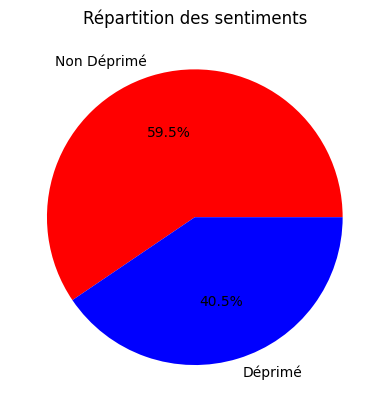

In [12]:
import matplotlib.pyplot as plt

vals_cible.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue'] )
plt.title("Répartition des sentiments")
plt.ylabel('')  # Pour enlever l'axe Y
plt.show()

In [13]:
# minority_class_size = vals_cible['Déprimé']  # 4984

# # Séparer les classes
# df_deprime = df[df['label'] == 'Déprimé']
# df_non_deprime = df[df['label'] == 'Non Déprimé'].sample(n=minority_class_size, random_state=42)

# # Réassembler le dataset équilibré
# df_balanced = pd.concat([df_deprime, df_non_deprime])
# df = df_balanced


In [14]:
vals_cible = df['label'].value_counts()
vals_cible

label
Non Déprimé    7315
Déprimé        4984
Name: count, dtype: int64

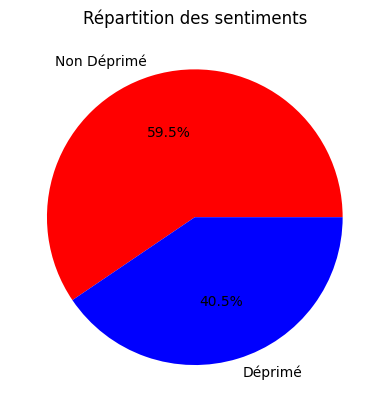

In [15]:
import matplotlib.pyplot as plt

vals_cible.plot(kind='pie', autopct='%1.1f%%'  , colors=['red', 'blue'])
plt.title("Répartition des sentiments")
plt.ylabel('')  # Pour enlever l'axe Y
plt.show()

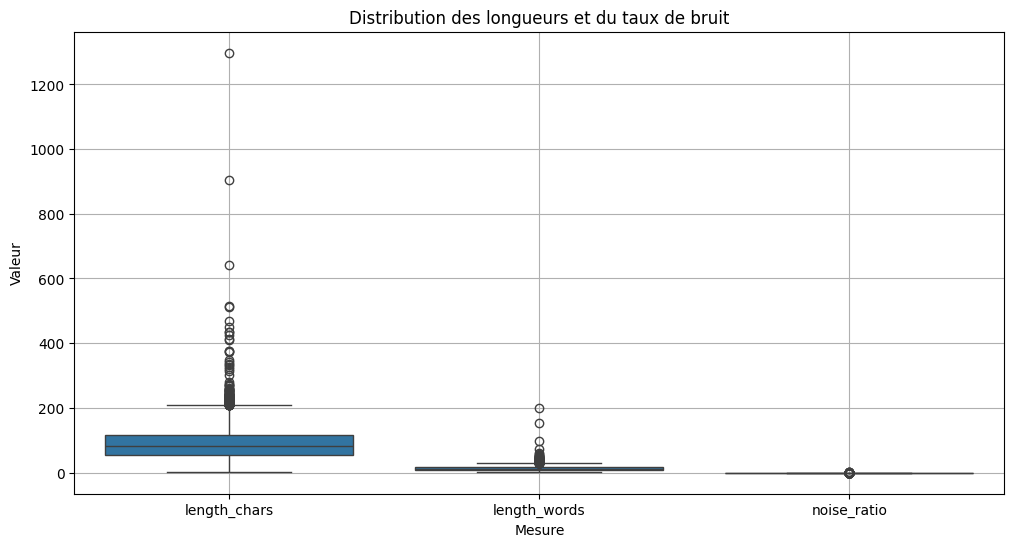

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Nettoyage des colonnes inutiles
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df = df.drop(columns=["label"], errors="ignore")

# Calcul des métriques
df["length_chars"] = df["content"].str.len()
df["length_words"] = df["content"].apply(lambda x: len(str(x).split()))
df["noise_ratio"] = df["content"].apply(lambda x: len(re.findall(r"[^a-zA-Z0-9\s]", str(x))) / max(1, len(str(x))))

# Transformation du dataframe au format long
df_long = pd.melt(df, value_vars=["length_chars", "length_words", "noise_ratio"],
                  var_name="Mesure", value_name="Valeur")

# Affichage des boxplots sur un seul graphe
plt.figure(figsize=(12, 6))
sns.boxplot(x="Mesure", y="Valeur", data=df_long)
plt.title("Distribution des longueurs et du taux de bruit")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Séparer les données en X (texte) et y (labels)
x = df['content']
y = df['label']
# 1) Label Encoding : Encodage des labels en numérique
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])  # Encode les labels en valeurs numériques
# 2) TF-IDF Vectorization : Conversion du texte en vecteurs numériques
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Stop words pour exclure les mots fréquents
x = tfidf_vectorizer.fit_transform(df['content'])  # Transforme le texte en vecteurs



# 3) Division des données : Séparer en train et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Afficher les résultats pour vérifier
print("Shape de x_train:", x_train.shape)
print("Shape de x_test:", x_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)


Shape de x_train: (9839, 26394)
Shape de x_test: (2460, 26394)
Shape de y_train: (9839,)
Shape de y_test: (2460,)


In [ ]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Ajout de XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Naïve Bayes - Accuracy: 78.33%
Logistic Regression - Accuracy: 83.70%
Passive Aggressive - Accuracy: 84.80%


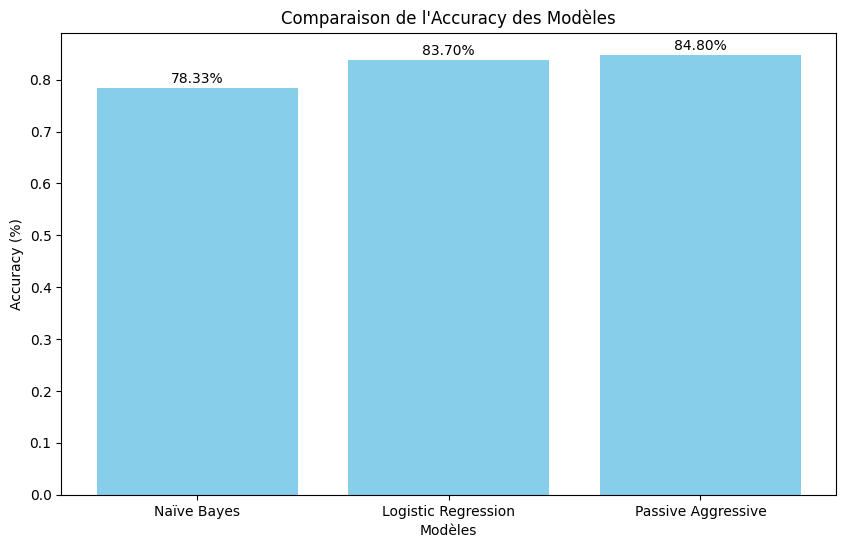

In [ ]:
# Initialiser les modèles et  Entraîner les modèles
na = MultinomialNB(alpha=0.5)
na.fit(x_train, y_train)

log_reg = LogisticRegression(max_iter=1000, C=1, penalty="l2", solver="liblinear")
log_reg.fit(x_train, y_train)

pac = PassiveAggressiveClassifier(C=1, max_iter=1000)
pac.fit(x_train, y_train)

rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20)
rf.fit(x_train, y_train)

svm = SVC(kernel="linear", C=1)
svm.fit(x_train, y_train)

xgb = XGBClassifier(eval_metric="logloss", n_estimators=100, max_depth=5, learning_rate=0.1)
xgb.fit(x_train, y_train)

# Liste des modèles avec leurs noms
models = {
    "Naïve Bayes": na,
    "Logistic Regression": log_reg,
    "Passive Aggressive": pac,
}

# Dictionnaire pour stocker les résultats de chaque modèle
results = {}

accuracy_results = {}  # Pour stocker l'accuracy de chaque modèle

# Boucle sur chaque modèle
for name, model in models.items():
    # Entraînement
    model.fit(x_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(x_test)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Sauvegarder les résultats
    results[name] = {
        "accuracy": accuracy,
        "f1_score": report['weighted avg']['f1-score'],
        "recall": report['weighted avg']['recall'],
        "precision": report['weighted avg']['precision'],
        "confusion_matrix": confusion
    }
    
    # Sauvegarder l'accuracy dans accuracy_results pour afficher plus tard
    accuracy_results[name] = accuracy  # Stocke l'accuracy du modèle
    
    # Affichage de l'accuracy
    print(f"{name} - Accuracy: {accuracy * 100:.2f}%")

# Maintenant, tu peux créer un graphique pour comparer l'accuracy de tous les modèles
import matplotlib.pyplot as plt

# Extraire les noms des modèles et les accuracies
models = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

# Créer le diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

# Ajouter les titres et labels
plt.title("Comparaison de l'Accuracy des Modèles")
plt.xlabel("Modèles")
plt.ylabel("Accuracy (%)")

# Afficher les valeurs des accuracies au-dessus de chaque barre
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy * 100:.2f}%", ha='center')

# Afficher le graphique
plt.show()


                     accuracy  f1_score    recall precision
Naïve Bayes          0.783333  0.775181  0.783333  0.787277
Logistic Regression  0.836992  0.833027  0.836992  0.840241
Passive Aggressive   0.847967  0.847565  0.847967  0.847391


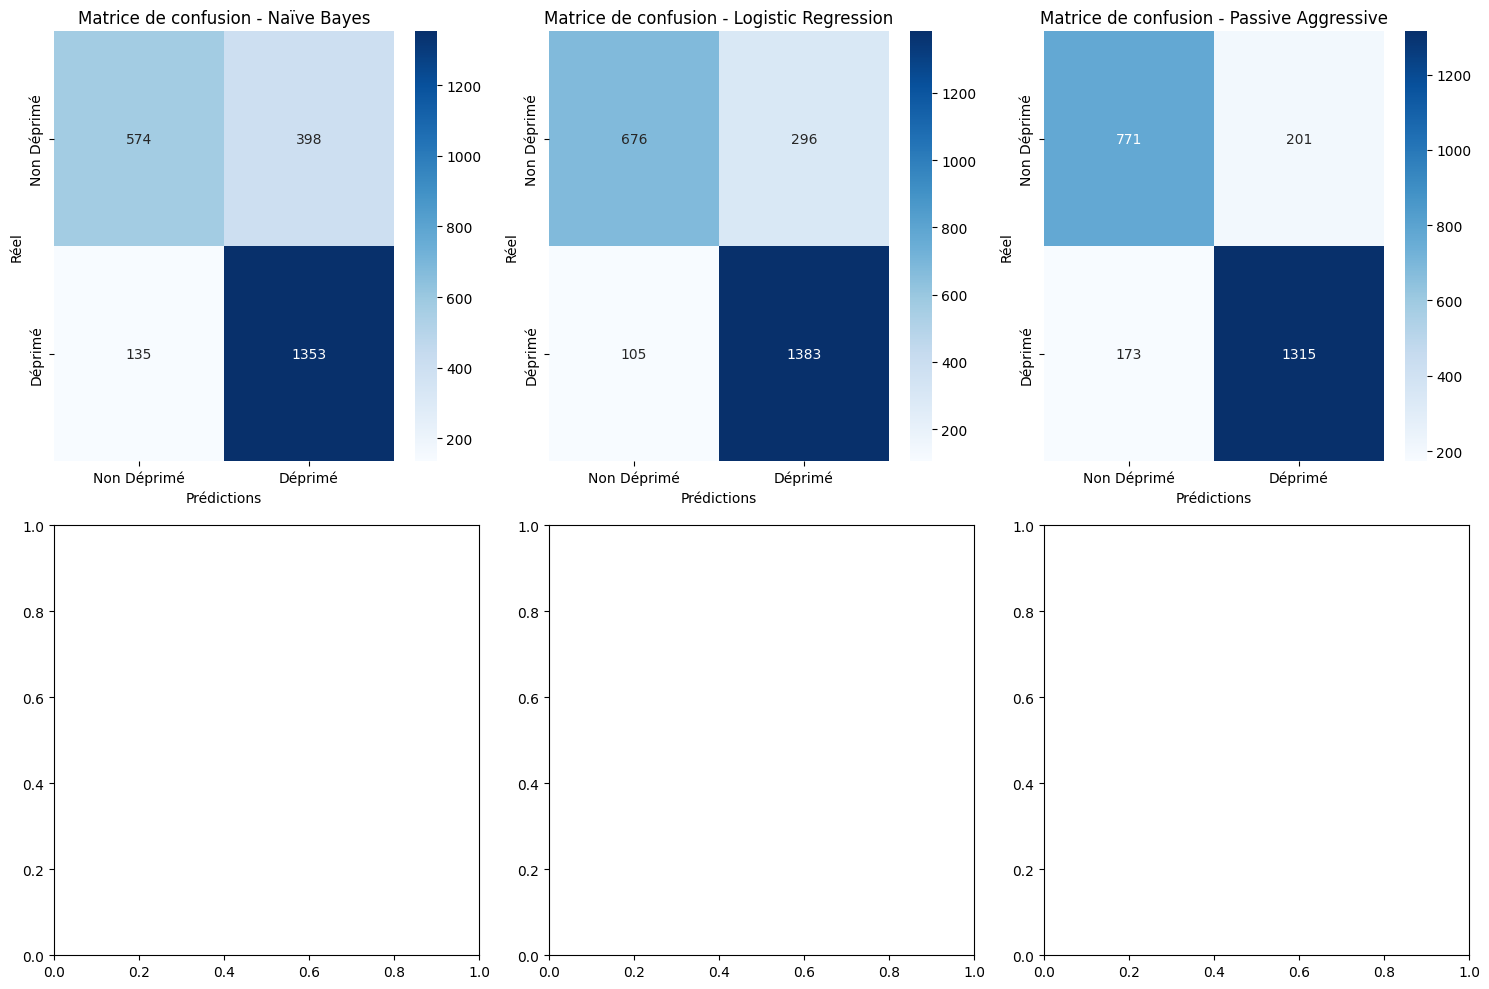

In [ ]:
# Afficher les métriques sous forme de DataFrame
df_results = pd.DataFrame(results).T  # Transposer pour un affichage plus clair
print(df_results[['accuracy', 'f1_score', 'recall', 'precision']])

# Définir les noms des classes
labels = ["Non Déprimé", "Déprimé"]

# Afficher la matrice de confusion pour chaque modèle
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(f"Matrice de confusion - {name}")
    axes[i].set_xlabel("Prédictions")
    axes[i].set_ylabel("Réel")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:

# # Définition des modèles et des hyperparamètres pour GridSearchCV
# param_grid = {
#     "Naïve Bayes": (MultinomialNB(), {
#         "alpha": [0.5, 1.0]  # Moins de valeurs testées
#     }),
#     "Logistic Regression": (LogisticRegression(max_iter=500), {  # max_iter réduit
#         "C": [0.1, 1],  # Seulement 2 valeurs
#         "penalty": ["l2"],  # Suppression de "l1"
#         "solver": ["liblinear"]
#     }),
#     "Passive Aggressive": (PassiveAggressiveClassifier(max_iter=500), {  # max_iter réduit
#         "C": [0.1, 1]  # Seulement 2 valeurs
#     }),
#     "Random Forest": (RandomForestClassifier(random_state=42), {
#         "n_estimators": [50, 100],  # Suppression de 200
#         "max_depth": [None, 10]  # Moins de tests sur la profondeur
#     }),
#     "SVM": (SVC(kernel="linear"), {
#         "C": [0.1, 1]  # Réduction du nombre de tests
#     }),
#     "XGBoost": (XGBClassifier(eval_metric="logloss", use_label_encoder=False), {
#         "n_estimators": [50, 100],  # Suppression de 200
#         "max_depth": [3, 5],  # Réduction de 7
#         "learning_rate": [0.1]  # Suppression de 0.01 et 0.3
#     })
# }

# # Stocker les résultats
# results = {}

# # Boucle sur chaque modèle pour trouver les meilleurs hyperparamètres avec GridSearchCV
# for name, (model, params) in param_grid.items():
#     print(f"Optimisation de {name} avec GridSearchCV...")
    
#     grid_search = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
#     grid_search.fit(x_train, y_train)
    
#     # Meilleur modèle et prédictions
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(x_test)
    
#     # Stocker les résultats
#     results[name] = {
#         "best_params": grid_search.best_params_,
#         "accuracy": accuracy_score(y_test, y_pred),
#         "classification_report": classification_report(y_test, y_pred, target_names=label_encoder.classes_),
#         "confusion_matrix": confusion_matrix(y_test, y_pred)
#     }
    
#     print(f"\n=== {name} ===")
#     print(f"Meilleurs paramètres: {grid_search.best_params_}")
#     print(f"Accuracy: {results[name]['accuracy']:.4f}")
#     print(results[name]["classification_report"])

# # Affichage des matrices de confusion
# labels = label_encoder.classes_

# fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# axes = axes.ravel()

# for i, (name, res) in enumerate(results.items()):
#     sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues",
#                 xticklabels=labels, yticklabels=labels, ax=axes[i])
#     axes[i].set_title(f"Matrice de confusion - {name}")
#     axes[i].set_xlabel("Prédictions")
#     axes[i].set_ylabel("Réel")

# plt.tight_layout()
# plt.show()

In [ ]:
# 4. **Test sur une nouvelle phrase**



# Liste des modèles avec leurs noms
models = {
    "Naïve Bayes": na,
    "Logistic Regression": log_reg,
    "Passive Aggressive": pac,
    # "Random Forest": rf,
    # "SVM": svm,
    # "XGBoost": xgb
}


# Liste de phrases de test (avec des phrases exprimant la dépression et la non-dépression)
test_phrases = [
    "I feel lost and hopeless, everything seems so dark.",  # Déprimé
    "I had a wonderful day, everything went smoothly and I feel really happy.",  # Non Déprimé
    "I can't seem to get out of bed, everything feels so overwhelming.",  # Déprimé
    "I am so grateful for my family and my work, I feel truly blessed.",  # Non Déprimé
    "Life seems so difficult and I don't know how to keep going.",  # Déprimé
    "I feel so alone, like nobody understands me.", # Déprimé
    "Everything feels too much to handle right now.", # Déprimé
    "I just want to give up, nothing feels worth it anymore." , #Déprimé
    "I can't remember the last time I felt happy or at peace.", #Déprimé
    "I'm feeling great today, everything is going well.",  #Non Déprimé
    "I had a really productive day, and I'm proud of what I accomplished.", #Non Déprimé
    "Spending time with friends always lifts my mood." #Non Déprimé
]

# Véritables labels pour ces phrases (dépression ou non-dépression)
y_true = ['Déprimé', 'Non Déprimé', 'Déprimé', 'Non Déprimé', 'Déprimé', 'Déprimé','Déprimé', 'Déprimé','Déprimé', 'Non Déprimé' , 'Non Déprimé' , 'Non Déprimé']


# Transformation de la nouvelle phrase avec TF-IDF
x_test_new = tfidf_vectorizer.transform(test_phrases)


acc = {}
# Affichage des résultats pour chaque modèle
for model_name, model in models.items():
    print(f"Testing model: {model_name}")
    
    # Prédiction du modèle sur les nouvelles phrases
    predictions = model.predict(x_test_new)

    # Affichage des résultats pour chaque phrase
    for i, phrase in enumerate(test_phrases):
        label = label_encoder.inverse_transform([predictions[i]])[0]
        true_label = y_true[i]
        print(f"Phrase: {phrase}")
        print(f"Prediction: {label}")
        print(f"Réel: {true_label}")
        print("-" * 50)
     # Calcul de l'accuracy pour ce modèle
    accuracy = accuracy_score(y_true, label_encoder.inverse_transform(predictions))
    # Calcul de l'accuracy
    acc[model_name] = accuracy
    # print(f"{model_name}--Accuracy: {accuracy * 100:.2f}%")
    # print("=" * 50)


for key, value in acc.items():
    print(f"{key} -- Accuracy: {value * 100:.2f}%")
   



Testing model: Naïve Bayes
Phrase: I feel lost and hopeless, everything seems so dark.
Prediction: Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: I had a wonderful day, everything went smoothly and I feel really happy.
Prediction: Non Déprimé
Réel: Non Déprimé
--------------------------------------------------
Phrase: I can't seem to get out of bed, everything feels so overwhelming.
Prediction: Non Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: I am so grateful for my family and my work, I feel truly blessed.
Prediction: Non Déprimé
Réel: Non Déprimé
--------------------------------------------------
Phrase: Life seems so difficult and I don't know how to keep going.
Prediction: Non Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: I feel so alone, like nobody understands me.
Prediction: Non Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: Everything feels 

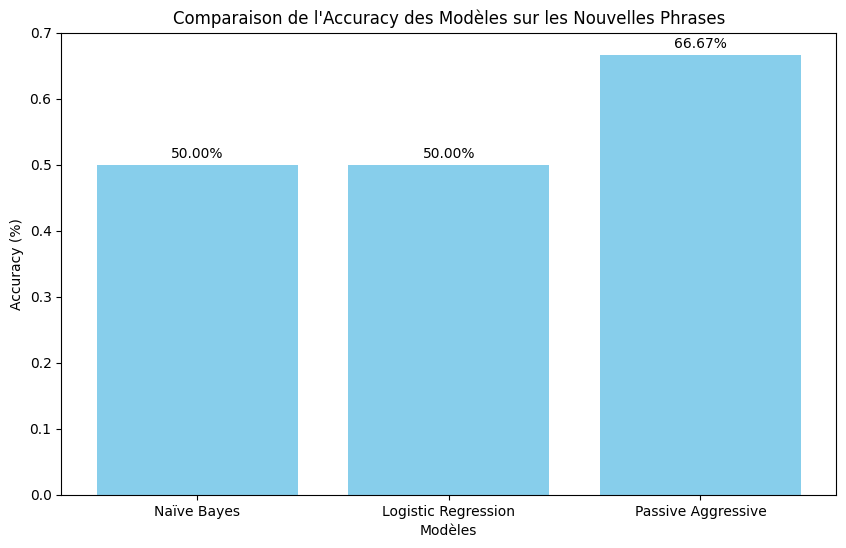

In [ ]:
# Création d'un graphique pour comparer l'accuracy de chaque modèle
import matplotlib.pyplot as plt

# Extraire les noms des modèles et les accuracies
models_names = list(acc.keys())
accuracies = list(acc.values())

# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracies, color='skyblue')

# Ajouter les titres et labels
plt.title("Comparaison de l'Accuracy des Modèles sur les Nouvelles Phrases")
plt.xlabel("Modèles")
plt.ylabel("Accuracy (%)")

# Afficher les valeurs d'accuracy au-dessus de chaque barre
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy * 100:.2f}%", ha='center')

# Afficher le graphique
plt.show()

### Test

Naïve Bayes - Accuracy: 79.49%

Logistic Regression - Accuracy: 82.80%

Passive Aggressive - Accuracy: 83.20%

Random Forest - Accuracy: 79.69%

SVM - Accuracy: 83.60%

XGBoost - Accuracy: 76.68%

### Test final 

Naïve Bayes -- Accuracy: 75.00%

Logistic Regression -- Accuracy: 66.67%

Passive Aggressive -- Accuracy: 66.67%

Random Forest -- Accuracy: 50.00%

SVM -- Accuracy: 66.67%

XGBoost -- Accuracy: 50.00%

In [ ]:
import pickle

In [ ]:
# "Naïve Bayes": na,
# "Logistic Regression": log_reg,
# "Passive Aggressive": pac,
# "Random Forest": rf,
# "SVM": svm,
# "XGBoost": xgb


with open ( 'model_passive_agressive.pkl', 'wb' ) as file :
     pickle.dump(pac , file)

with open ( 'encodeurs.pkl', 'wb' ) as file :
     pickle.dump(label_encoder , file)

with open ( 'tfidf.pkl', 'wb' ) as file :
     pickle.dump(tfidf_vectorizer , file)


In [ ]:
# Charger les objets sauvegardés
with open('model_passive_agressive.pkl', 'rb') as file:
    passive_agg = pickle.load(file)

with open('encodeurs.pkl', 'rb') as file:
    encodeur = pickle.load(file)

with open('tfidf.pkl', 'rb') as file:
    tfidf = pickle.load(file)

In [ ]:
# Liste de phrases de test (avec des phrases exprimant la dépression et la non-dépression)
test_phrases = [
    "I feel lost and hopeless, everything seems so dark.",  # Déprimé
    "I had a wonderful day, everything went smoothly and I feel really happy.",  # Non Déprimé
    "I can't seem to get out of bed, everything feels so overwhelming.",  # Déprimé
    "I am so grateful for my family and my work, I feel truly blessed.",  # Non Déprimé
    "Life seems so difficult and I don't know how to keep going.",  # Déprimé
    "I feel so alone, like nobody understands me.", # Déprimé
    "Everything feels too much to handle right now.", # Déprimé
    "I just want to give up, nothing feels worth it anymore." , #Déprimé
    "I can't remember the last time I felt happy or at peace.", #Déprimé
    "I'm feeling great today, everything is going well.",  #Non Déprimé
    "I had a really productive day, and I'm proud of what I accomplished.", #Non Déprimé
    "Spending time with friends always lifts my mood." #Non Déprimé
]

# Véritables labels pour ces phrases (dépression ou non-dépression)
y_true = ['Déprimé', 'Non Déprimé', 'Déprimé', 'Non Déprimé', 'Déprimé', 'Déprimé','Déprimé', 'Déprimé','Déprimé', 'Non Déprimé' , 'Non Déprimé' , 'Non Déprimé']

In [ ]:
# Transformer les nouvelles phrases avec le `tfidf_vectorizer`
x_test_new = tfidf.transform(test_phrases)

# Prédiction avec le modèle chargé
predictions = passive_agg.predict(x_test_new)

# Inverse transformation des prédictions pour récupérer les labels en texte
predicted_labels = encodeur.inverse_transform(predictions)

In [ ]:
# Affichage des résultats pour chaque phrase
for i, phrase in enumerate(test_phrases):
    label = predicted_labels[i]
    true_label = y_true[i]
    print(f"Phrase: {phrase}")
    print(f"Prediction: {label}")
    print(f"Réel: {true_label}")
    print("-" * 50)

# Calcul de l'accuracy
accuracy = accuracy_score(y_true, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Phrase: I feel lost and hopeless, everything seems so dark.
Prediction: Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: I had a wonderful day, everything went smoothly and I feel really happy.
Prediction: Non Déprimé
Réel: Non Déprimé
--------------------------------------------------
Phrase: I can't seem to get out of bed, everything feels so overwhelming.
Prediction: Non Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: I am so grateful for my family and my work, I feel truly blessed.
Prediction: Non Déprimé
Réel: Non Déprimé
--------------------------------------------------
Phrase: Life seems so difficult and I don't know how to keep going.
Prediction: Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: I feel so alone, like nobody understands me.
Prediction: Non Déprimé
Réel: Déprimé
--------------------------------------------------
Phrase: Everything feels too much to handle right now.
P